In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image
from glob import glob
 
from sklearn.model_selection import train_test_split
from sklearn import metrics
 
import cv2
import gc
import os
 
import tensorflow as tf
from tensorflow import keras
from keras import layers
 
import warnings
warnings.filterwarnings('ignore')

In [3]:
from zipfile import ZipFile
path = r"C:\Users\PAVAN G\Downloads\archive (1).zip"
with ZipFile(path,"r") as f:
    f.extractall()
    print("Extracted Succsessfully.")
    

Extracted Succsessfully.


In [5]:

path = 'lung_colon_image_set/lung_image_sets'
classes = os.listdir(path)
classes


['lung_aca', 'lung_n', 'lung_scc']

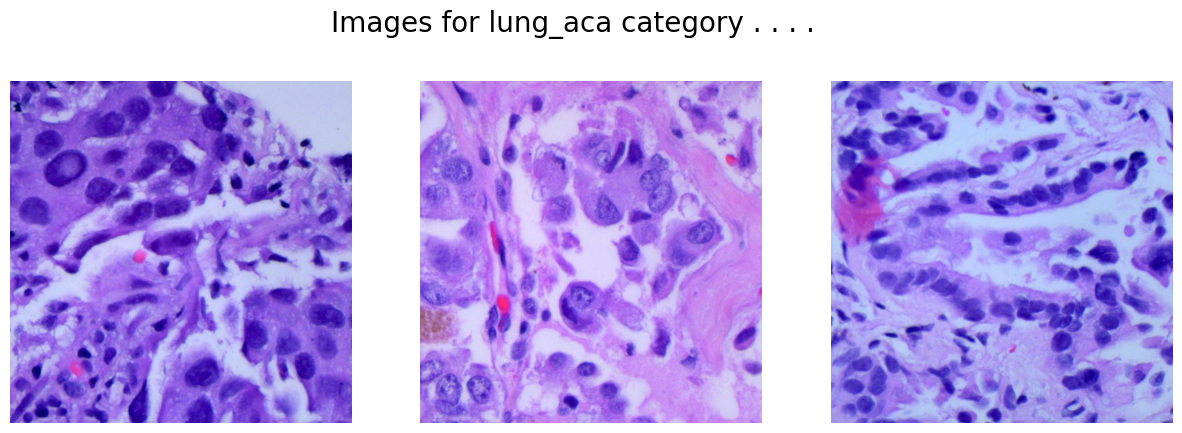

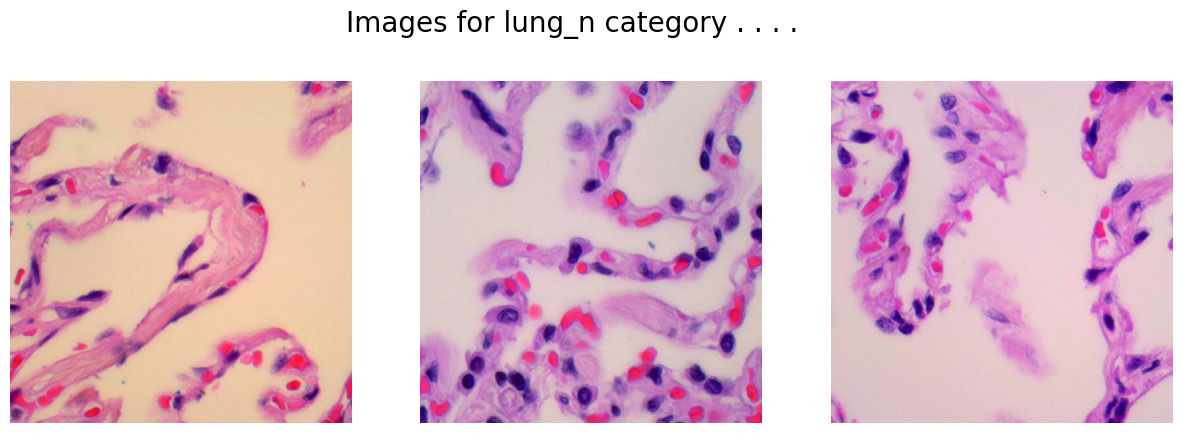

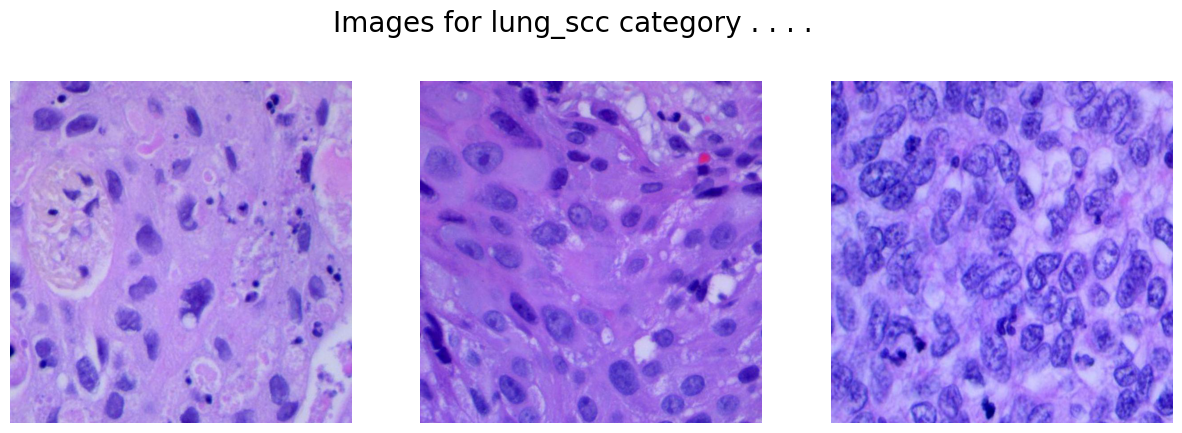

In [7]:
path = r"C:\Users\PAVAN G\Downloads\archive (1)\lung_colon_image_set\lung_image_sets"

for cat in classes:
	image_dir = f'{path}/{cat}'
	images = os.listdir(image_dir)

	fig, ax = plt.subplots(1, 3, figsize=(15, 5))
	fig.suptitle(f'Images for {cat} category . . . .', fontsize=20)

	for i in range(3):
		k = np.random.randint(0, len(images))
		img = np.array(Image.open(f'{path}/{cat}/{images[k]}'))
		ax[i].imshow(img)
		ax[i].axis('off')
	plt.show()


In [9]:
IMG_SIZE = 256



In [11]:
X = []
Y = []

for i, cat in enumerate(classes):
    images = glob(f'{path}/{cat}/*.jpeg')

for image in images:
	img = cv2.imread(image)
	
	X.append(cv2.resize(img, (IMG_SIZE, IMG_SIZE)))
	Y.append(i)

X = np.asarray(X)
Y = np.asarray(Y)


In [14]:
X_train, X_val, Y_train, Y_val = train_test_split(X,Y,
												test_size = 0.2,
												random_state = 2022)
print(X_train.shape, X_val.shape)


(4000, 256, 256, 3) (1000, 256, 256, 3)


In [16]:
from keras.utils import to_categorical

# Assuming y_train is your target labels
Y_train = to_categorical(Y_train, num_classes=3)
Y_val = to_categorical(Y_val, num_classes=3)

In [18]:
model = keras.models.Sequential([
	layers.Conv2D(filters=32,
				kernel_size=(5, 5),
				activation='relu',
				input_shape=(IMG_SIZE,
							IMG_SIZE,
							3),
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=64,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Conv2D(filters=128,
				kernel_size=(3, 3),
				activation='relu',
				padding='same'),
	layers.MaxPooling2D(2, 2),

	layers.Flatten(),
	layers.Dense(256, activation='relu'),
	layers.BatchNormalization(),
	layers.Dense(128, activation='relu'),
	layers.Dropout(0.3),
	layers.BatchNormalization(),
	layers.Dense(3, activation='softmax')
])


In [20]:
model.summary()


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 256, 256, 32)   │         2,432 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 128, 128, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 64, 64, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 32, 32, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 131072)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    33,554,688 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 3)              │           387 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 33,684,291 (128.50 MB)

 Trainable params: 33,683,523 (128.49 MB)

 Non-trainable params: 768 (3.00 KB)

In [22]:
keras.utils.plot_model(
	model,
	show_shapes = True,
	show_dtype = True,
	show_layer_activations = True
)


You must install pydot (`pip install pydot`) for `plot_model` to work.


In [24]:
model.compile(
	optimizer = 'adam',
	loss = 'categorical_crossentropy',
	metrics = ['accuracy']
)
history = model.fit(X_train, Y_train, epochs=5)


Epoch 1/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 122s 914ms/step - accuracy: 0.5899 - loss: 1.0732
Epoch 2/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 151s 1s/step - accuracy: 0.9785 - loss: 0.1756
Epoch 3/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 210s 2s/step - accuracy: 0.9961 - loss: 0.0403
Epoch 4/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 150s 1s/step - accuracy: 0.9995 - loss: 0.0143
Epoch 5/5
125/125 ━━━━━━━━━━━━━━━━━━━━ 112s 896ms/step - accuracy: 0.9998 - loss: 0.0078


In [30]:
yp=model.predict(X_val)
yp[:4]


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 193ms/step


array([[2.88402371e-05, 5.68905925e-05, 9.99914289e-01],
       [1.24554515e-06, 4.14501574e-06, 9.99994636e-01],
       [9.13792930e-04, 8.90757481e-04, 9.98195469e-01],
       [1.16555944e-04, 1.86544028e-04, 9.99696970e-01]], dtype=float32)

In [36]:
d=np.argmax(yp[4])
d

2

In [38]:
model.evaluate(X_val,Y_val)

32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 191ms/step - accuracy: 1.0000 - loss: 0.0018


[0.0019933627918362617, 1.0]

array([0., 0., 1.])